<a href="https://colab.research.google.com/github/shnajeeb/CoolingEFF/blob/main/GenDATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

       Server Load (%)  External Temperature (°C)  Humidity (%)  \
count      1000.000000                1000.000000   1000.000000   
mean         74.512828                  25.210519     50.144344   
std          14.606868                   8.765697     17.440452   
min          50.231601                  10.096548     20.000698   
25%          61.798663                  17.232228     35.681059   
50%          74.840369                  25.562017     50.036835   
75%          87.215979                  32.813952     65.546212   
max          99.985884                  39.982412     79.869251   

       Cooling Output (kWh)  HVAC Power Consumption (kW)  
count           1000.000000                  1000.000000  
mean            1344.148042                   335.043638  
std              231.724731                    60.852714  
min              826.083263                   175.163627  
25%             1154.501332                   287.493983  
50%             1341.281826               

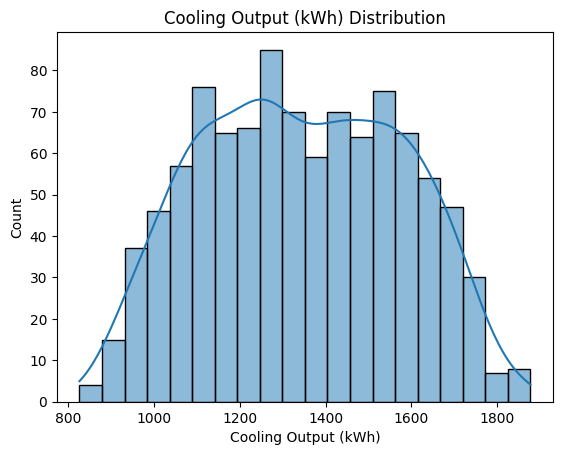

Gradient Boosting MAE: 49.08


In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Step 1: Generate synthetic data
num_samples = 1000
server_load = np.random.uniform(50, 100, num_samples)  # Server Load (%)
external_temp = np.random.uniform(10, 40, num_samples)  # External Temperature (°C)
humidity = np.random.uniform(20, 80, num_samples)  # Humidity (%)

# Add variability to Cooling Output based on inputs
cooling_output = (
    15 * server_load +
    5 * external_temp +
    2 * humidity +
    np.random.normal(0, 50, num_samples)  # Add randomness for variability
)

# Simulate HVAC power consumption based on cooling output
hvac_power = cooling_output / 4 + np.random.normal(0, 20, num_samples)

# Create a DataFrame
data = pd.DataFrame({
    "Server Load (%)": server_load,
    "External Temperature (°C)": external_temp,
    "Humidity (%)": humidity,
    "Cooling Output (kWh)": cooling_output,
    "HVAC Power Consumption (kW)": hvac_power
})

# Step 2: Inspect the generated data
print(data.describe())  # View summary statistics

# Optional: Plot distribution of Cooling Output
sns.histplot(data['Cooling Output (kWh)'], bins=20, kde=True)
plt.title('Cooling Output (kWh) Distribution')
plt.show()

# Step 3: Prepare data for model training
X = data[['Server Load (%)', 'External Temperature (°C)', 'Humidity (%)']]
y = data['Cooling Output (kWh)']

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Step 6: Predict and evaluate Gradient Boosting model
y_pred_gb = gb_model.predict(X_test)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
print(f"Gradient Boosting MAE: {mae_gb:.2f}")

# Optionally, you could evaluate Random Forest and Linear Regression as well:
# Random Forest Model
# from sklearn.ensemble import RandomForestRegressor
# rf_model = RandomForestRegressor(random_state=42)
# rf_model.fit(X_train, y_train)
# y_pred_rf = rf_model.predict(X_test)
# mae_rf = mean_absolute_error(y_test, y_pred_rf)
# print(f"Random Forest MAE: {mae_rf:.2f}")

# Linear Regression Model
# from sklearn.linear_model import LinearRegression
# lr_model = LinearRegression()
# lr_model.fit(X_train, y_train)
# y_pred_lr = lr_model.predict(X_test)
# mae_lr = mean_absolute_error(y_test, y_pred_lr)
# print(f"Linear Regression MAE: {mae_lr:.2f}")


In [13]:
import joblib
joblib.dump(model, 'cooling_model.pkl')


['cooling_model.pkl']

In [15]:
!streamlit run app.py


/bin/bash: line 1: streamlit: command not found
